# Brain Tumor Classification Using CNNs

Data is sourced from kaggle dataset https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/code?datasetId=1608934&sortBy=voteCount

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/My Drive/scai w23/brain_tumor_data 2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_data/Training/glioma/Tr-gl_1123.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_1123.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_0563.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_0563.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_0205.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_0205.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_0211.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_0211.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_0577.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_0577.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_0239.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_0239.jpg  
  inflating: brain_tumor_data/Training/glioma/Tr-gl_1127.jpg  
  inflating: __MACOSX/brain_tumor_data/Training/glioma/._Tr-gl_1

# Imports and Data Preprocessing

In [3]:
# imports

import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt

# Miscellaneous
from tqdm import tqdm
import os
import random

In [28]:
batch_size = 32 # The batch size
img_height = 200 # Image resize height
img_width = 200 # Image resize width
data_dir = "brain_tumor_data/Training" # Data directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


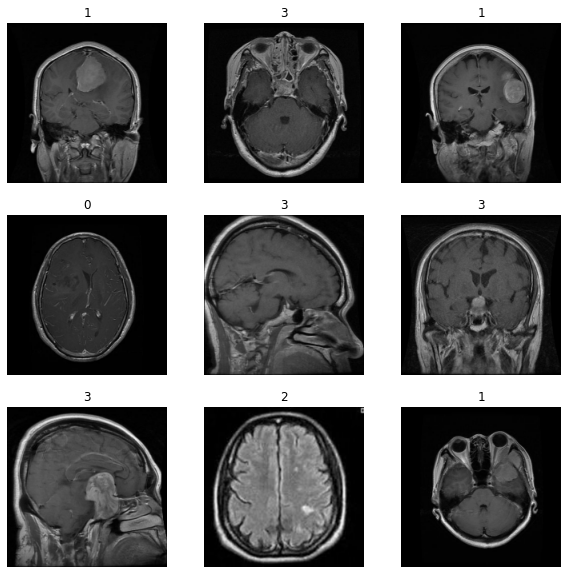

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

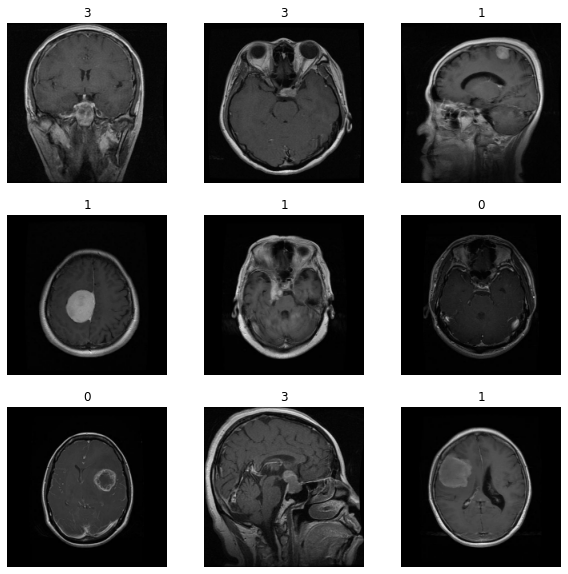

In [30]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
# Step 1
img_height = 200
img_width = 200
train_data_dir = "brain_tumor_data/Training"
test_data_dir = "brain_tumor_data/Testing"
batch_size = 32
# Step 4
class_names = list(range(4))

# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Create test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  labels = class_names,
  shuffle=False,
  batch_size=1)

# Step 2
for features_batch, labels_batch in train_ds:
  print(features_batch.shape)
  print(labels_batch.shape)
  break

for features_batch, labels_batch in test_ds:
  print(features_batch.shape)
  print(labels_batch.shape)
  break

for features_batch, labels_batch in val_ds:
  print(features_batch.shape)
  print(labels_batch.shape)
  break

# Step 3
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 4 files belonging to 1 classes.
(32, 200, 200, 3)
(32,)
(1, 200, 200, 3)
(1,)
(32, 200, 200, 3)
(32,)


# Fully connected NN

In [5]:
# fully connected nn
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD

# Build model
model = tf.keras.models.Sequential()
model.add(Input(shape=(200, 200, 3)))
model.add(Flatten())
model.add(Dense(20, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))

# Get model summary
model.summary()

# Training the model
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD())

history = model.fit(train_ds, validation_data=val_ds, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 20)                2400020   
                                                                 
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 26)                1326      
                                                                 
Total params: 2,402,396
Trainable params: 2,402,396
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
143/143 [==============================] - 12s 60ms/step - loss: 1.3644 - accuracy: 0.4341 - val_loss: 1.0592 - val_accuracy: 0.5455
Epoch 2/5
143/143 [================

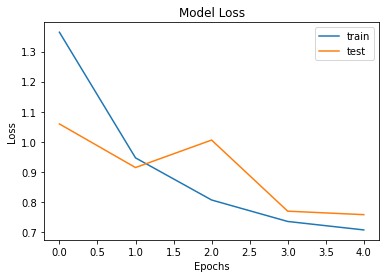

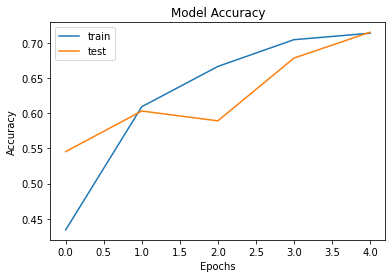

In [6]:
def plot_model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.show()

def plot_model_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.show()

plot_model_loss(history)
plot_model_accuracy(history)

Accuracy better than expected for fully connected nn

# CNN

In [7]:
from keras.layers import Conv2D, MaxPooling2D
def build_model():
    model = Sequential()
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(filters = 10, kernel_size = (5, 5), strides=1, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 10, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 5, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 5, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(26, activation = 'sigmoid'))
    return model

model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 10)      760       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 10)        2510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 5)         1255      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 5)       

Epoch 1/5
143/143 [==============================] - 15s 63ms/step - loss: 1.4319 - accuracy: 0.3996 - val_loss: 1.2061 - val_accuracy: 0.4046
Epoch 2/5
143/143 [==============================] - 8s 55ms/step - loss: 0.9444 - accuracy: 0.6103 - val_loss: 1.0301 - val_accuracy: 0.5665
Epoch 3/5
143/143 [==============================] - 12s 80ms/step - loss: 0.7623 - accuracy: 0.6950 - val_loss: 0.7376 - val_accuracy: 0.7040
Epoch 4/5
143/143 [==============================] - 9s 62ms/step - loss: 0.6524 - accuracy: 0.7431 - val_loss: 0.7544 - val_accuracy: 0.6944
Epoch 5/5
143/143 [==============================] - 10s 66ms/step - loss: 0.5904 - accuracy: 0.7678 - val_loss: 0.6268 - val_accuracy: 0.7426


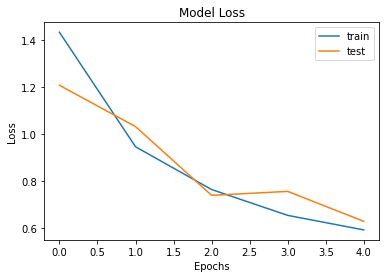

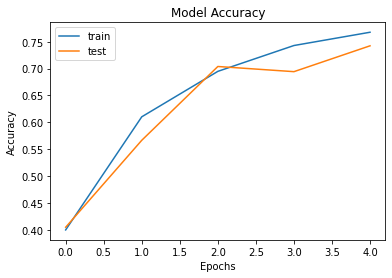

In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD())

history = model.fit(train_ds, validation_data=val_ds, epochs=5)

plot_model_loss(history)
plot_model_accuracy(history)

A little better than the fully connected NN

Epoch 1/5
143/143 [==============================] - 11s 74ms/step - loss: 1.6145 - accuracy: 0.2608 - val_loss: 1.4630 - val_accuracy: 0.2811
Epoch 2/5
143/143 [==============================] - 9s 57ms/step - loss: 1.4204 - accuracy: 0.2538 - val_loss: 1.4729 - val_accuracy: 0.2023
Epoch 3/5
143/143 [==============================] - 10s 66ms/step - loss: 1.4095 - accuracy: 0.2582 - val_loss: 1.4001 - val_accuracy: 0.2601
Epoch 4/5
143/143 [==============================] - 10s 65ms/step - loss: 1.4074 - accuracy: 0.2495 - val_loss: 1.4277 - val_accuracy: 0.2023
Epoch 5/5
143/143 [==============================] - 8s 53ms/step - loss: 1.4071 - accuracy: 0.2565 - val_loss: 1.4081 - val_accuracy: 0.2566
Epoch 1/5
143/143 [==============================] - 11s 66ms/step - loss: 1.9424 - accuracy: 0.3755 - val_loss: 1.1948 - val_accuracy: 0.3792
Epoch 2/5
143/143 [==============================] - 12s 83ms/step - loss: 0.9050 - accuracy: 0.6328 - val_loss: 0.7228 - val_accuracy: 0.7233
E

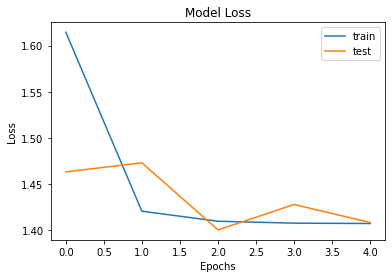

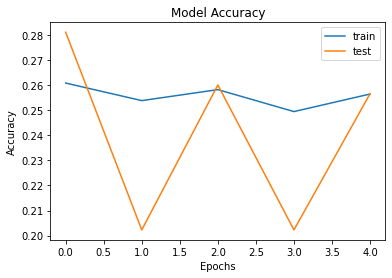

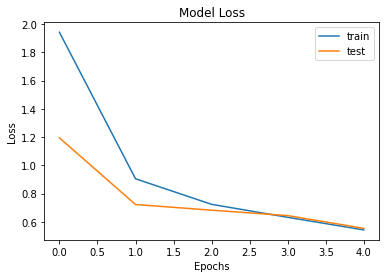

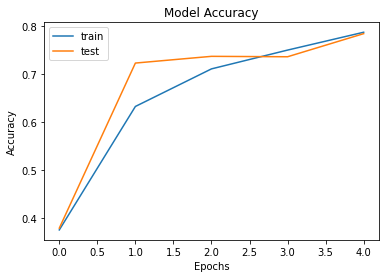

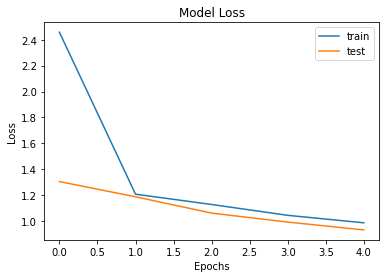

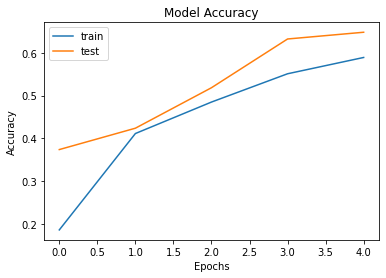

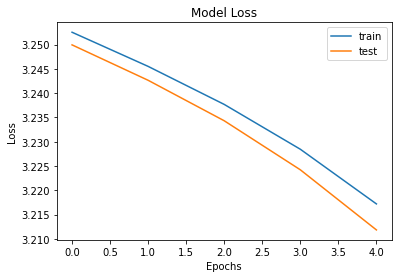

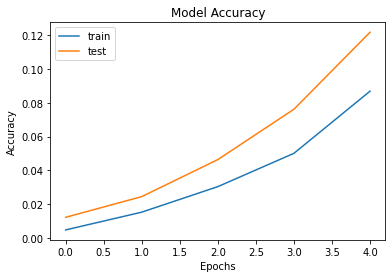

In [9]:
# attempt to tune the optimizer
# build 4 models
model_1 = build_model()
model_2 = build_model()
model_3 = build_model()
model_4 = build_model()

# compile models
model_1.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.1))
model_2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.01))
model_3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.001))
model_4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.0001))

# train models
history_1 = model_1.fit(train_ds, validation_data=val_ds, epochs=5)
history_2 = model_2.fit(train_ds, validation_data=val_ds, epochs=5)
history_3 = model_3.fit(train_ds, validation_data=val_ds, epochs=5)
history_4 = model_4.fit(train_ds, validation_data=val_ds, epochs=5)

# graph results
plot_model_loss(history_1)
plot_model_accuracy(history_1)

plot_model_loss(history_2)
plot_model_accuracy(history_2)

plot_model_loss(history_3)
plot_model_accuracy(history_3)

plot_model_loss(history_4)
plot_model_accuracy(history_4)

Model 2 SGD(0.01) works best

Epoch 1/5
143/143 [==============================] - 14s 95ms/step - loss: 1.6920 - accuracy: 0.3663 - val_loss: 1.2379 - val_accuracy: 0.3940
Epoch 2/5
143/143 [==============================] - 11s 75ms/step - loss: 1.0632 - accuracy: 0.5530 - val_loss: 0.8304 - val_accuracy: 0.6602
Epoch 3/5
143/143 [==============================] - 16s 106ms/step - loss: 0.7945 - accuracy: 0.6919 - val_loss: 0.6881 - val_accuracy: 0.7233
Epoch 4/5
143/143 [==============================] - 9s 64ms/step - loss: 0.6536 - accuracy: 0.7442 - val_loss: 0.5534 - val_accuracy: 0.7898
Epoch 5/5
143/143 [==============================] - 8s 55ms/step - loss: 0.5634 - accuracy: 0.7753 - val_loss: 0.6100 - val_accuracy: 0.7478
Epoch 1/5
143/143 [==============================] - 9s 59ms/step - loss: 1.4994 - accuracy: 0.4298 - val_loss: 1.0660 - val_accuracy: 0.5394
Epoch 2/5
143/143 [==============================] - 10s 65ms/step - loss: 0.7870 - accuracy: 0.6873 - val_loss: 0.5562 - val_accuracy: 0.8021
E

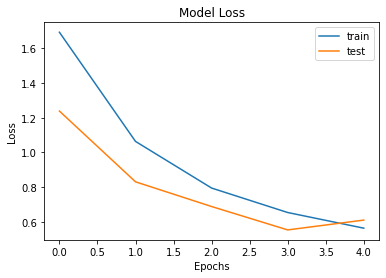

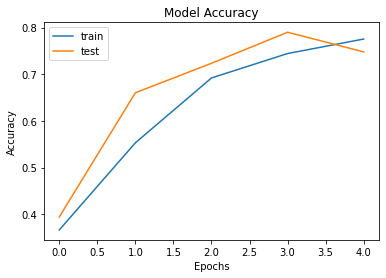

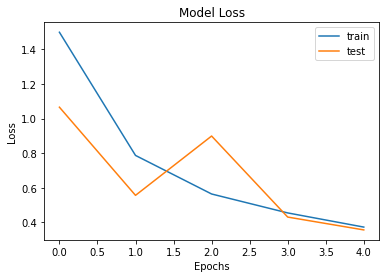

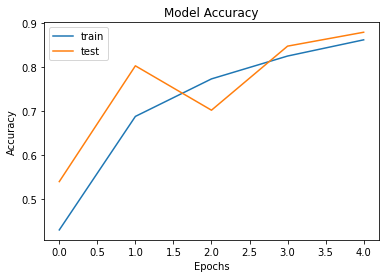

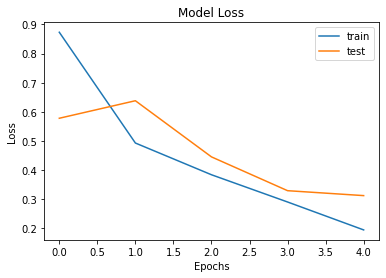

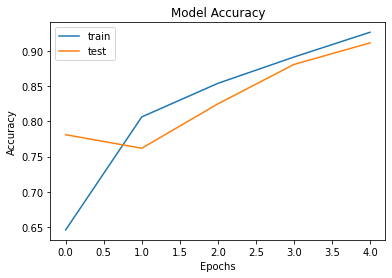

In [10]:
from keras.optimizers import Adam

# fine tune model 2
def build_model_2():
    model = Sequential()
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(filters = 10, kernel_size = (5, 5), strides=1, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 10, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 10, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 20, kernel_size = (5, 5), strides=1, padding = 'Same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(26, activation = 'sigmoid'))
    return model

# compile model_2 and try different optimizers
model_2a = build_model_2() # SGD(0.01) optimizer
model_2b = build_model_2() # SGD(0.025) optimizer
model_2c = build_model_2() # Adam optimizer

model_2a.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.01))
model_2b.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=SGD(0.025))
model_2c.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer=Adam())

# train models
history_2a = model_2a.fit(train_ds, validation_data=val_ds, epochs=5)
history_2b = model_2b.fit(train_ds, validation_data=val_ds, epochs=5)
history_2c = model_2c.fit(train_ds, validation_data=val_ds, epochs=5)

# plots
plot_model_loss(history_2a)
plot_model_accuracy(history_2a)

plot_model_loss(history_2b)
plot_model_accuracy(history_2b)

plot_model_loss(history_2c)
plot_model_accuracy(history_2c)

Model 2b and 2c did better but performed about the same on some randomly selected images from a test set.

In [12]:
# test set on model2
print(model_2b.evaluate(test_ds))

# test set on model2b
print(model_2c.evaluate(test_ds))

4/4 [==============================] - 0s 8ms/step - loss: 0.1270 - accuracy: 1.0000
[0.12701667845249176, 1.0]
4/4 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 1.0000
[0.008614689111709595, 1.0]


# Transfer Learning
VGG16

In [14]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Import the VGG16 trained neural network model, minus it's last (top) neuron layer.
base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (200, 200, 3), 
                   pooling = None)

base_model.summary()

for layer in base_model.layers:  
    print(layer)
    layer.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [15]:
# Now add layers
x = Flatten()(base_model.output)
x = Dense(120, activation = 'relu')(x)
x = Dense(26, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = x) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics ='accuracy', optimizer=Adam())

In [19]:
# preprocess data again for reasons i dont know
img_height = 200
img_width = 200
train_data_dir = "brain_tumor_data/Training"
test_data_dir = "brain_tumor_data/Testing"
batch_size = 32
class_names = list(range(4))

# create datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size = (img_height, img_width),
    labels = class_names,
    batch_size = 1,
    shuffle = False,
    seed = 123)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 4 files belonging to 1 classes.


Epoch 1/5
143/143 [==============================] - 20s 140ms/step - loss: 0.1407 - accuracy: 0.9495 - val_loss: 0.1859 - val_accuracy: 0.9291
Epoch 2/5
143/143 [==============================] - 21s 146ms/step - loss: 0.0879 - accuracy: 0.9691 - val_loss: 0.3471 - val_accuracy: 0.8704
Epoch 3/5
143/143 [==============================] - 21s 145ms/step - loss: 0.0561 - accuracy: 0.9838 - val_loss: 0.2276 - val_accuracy: 0.9124
Epoch 4/5
143/143 [==============================] - 22s 154ms/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.1575 - val_accuracy: 0.9448
Epoch 5/5
143/143 [==============================] - 23s 161ms/step - loss: 0.0239 - accuracy: 0.9952 - val_loss: 0.1959 - val_accuracy: 0.9448


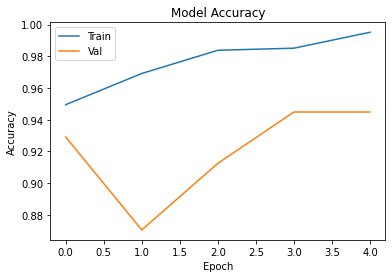

In [20]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

# Plot the training curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [21]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 11ms/step - loss: 0.1592 - accuracy: 1.0000


[0.15917624533176422, 1.0]